#Group3_Data_Operations

In [1]:
# %pip install geoalchemy2

In [2]:
#@title Import relevant modules
import os
import sys
import pandas as pd
import geopandas as gpd
import sqlalchemy as sq
from matplotlib import pyplot as plt
from dotenv import load_dotenv

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_50071/1263603061.py:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling

In [3]:
# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
os.chdir('/data')
load_dotenv('docker/.env')
PGUSER = os.getenv('POSTGRES_USER')
PGPW = os.getenv('POSTGRES_PW')
PGDB = os.getenv('POSTGRES_DB')

In [4]:
regions = "data/2021CensusAgRegions/lcar000b21a_e.dbf"
gdfRegions = gpd.read_file(regions, encoding='utf-8')

In [5]:
stations = "data/climate_station_list.csv"
dfStations = pd.read_csv(stations)

In [6]:

gdfStationsHly = gpd.GeoDataFrame(dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude))
gdfStationsHly = gdfStationsHly.loc[dfStations['HLY Last Year'] > 1995]

In [7]:
gdfStationsDly = gpd.GeoDataFrame(dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude))
gdfStationsDly = gdfStationsDly.loc[dfStations['HLY Last Year'] > 1995]

In [8]:
gdfRegions = gdfRegions.to_crs("EPSG:3347")
gdfStationsHly = gdfStationsHly.set_crs("EPSG:4326", allow_override=True)
gdfStationsHly = gdfStationsHly.to_crs("EPSG:3347")
gdfStationsDly = gdfStationsDly.set_crs("EPSG:4326", allow_override=True)
gdfStationsDly = gdfStationsDly.to_crs("EPSG:3347")

In [11]:
# verification


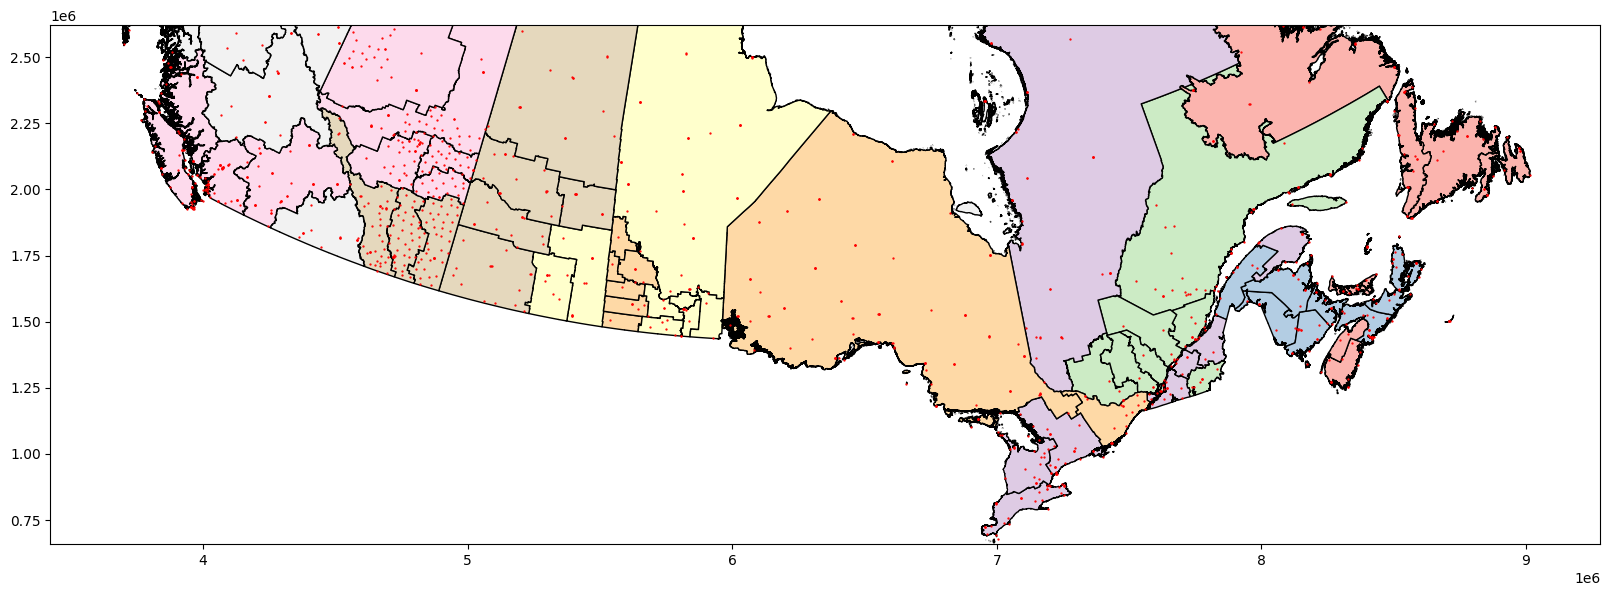

In [9]:
minx, miny, maxx, maxy = gdfRegions.total_bounds
# plot the both
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny, maxy/2.0)
gdfRegions.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStationsHly.plot(ax=ax, color='red', markersize=0.4)
plt.show()

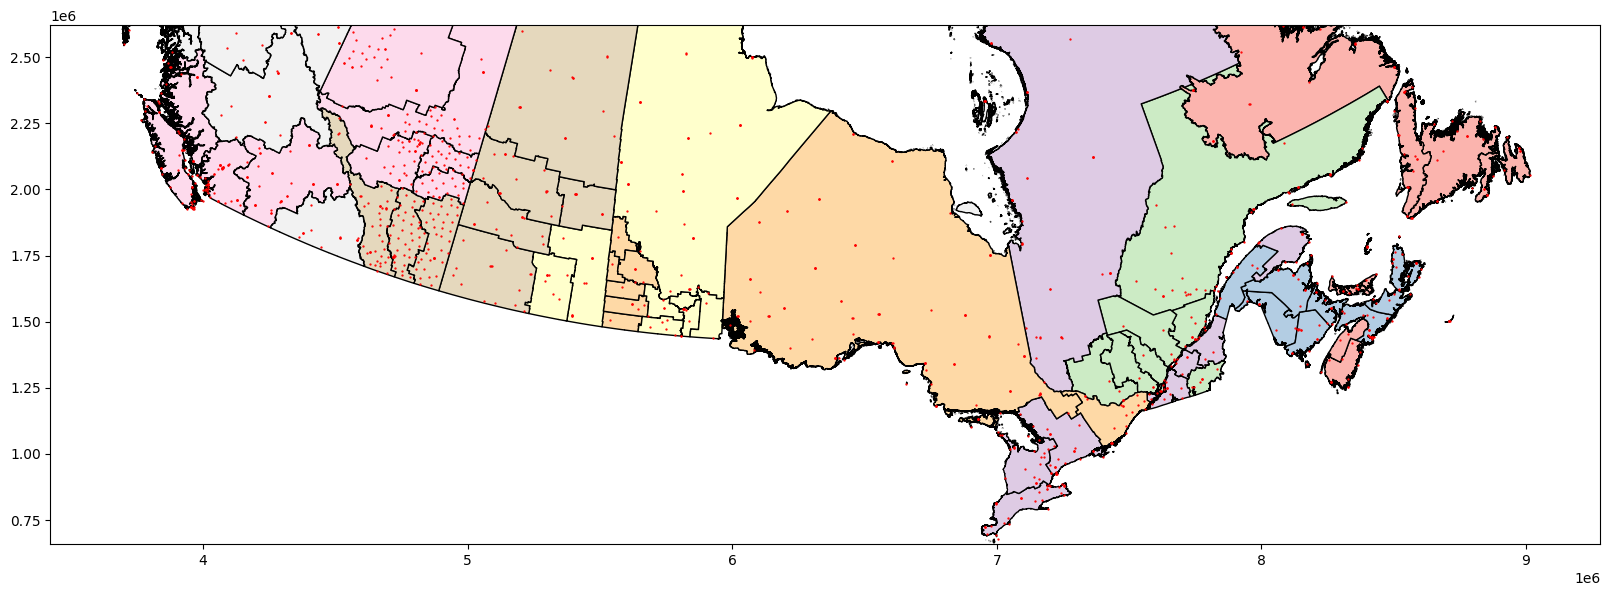

In [10]:
minx, miny, maxx, maxy = gdfRegions.total_bounds
# plot the both
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny, maxy/2.0)
gdfRegions.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStationsDly.plot(ax=ax, color='red', markersize=0.4)
plt.show()

In [14]:
gdfRegions.head()

,CARUID,DGUID,CARENAME,CARFNAME,LANDAREA,PRUID,geometry
0,1001,2021S05011001,Census Agricultural Region 1,b'52e967696f6e2061677269636f6c6520646520726563...,15020.1,10,"MULTIPOLYGON (((8887835.569 2084264.706, 88878..."
1,1002,2021S05011002,Census Agricultural Region 2,b'52e967696f6e2061677269636f6c6520646520726563...,54148.8,10,"MULTIPOLYGON (((8841194.729 2213093.663, 88411..."
2,1003,2021S05011003,Census Agricultural Region 3,b'52e967696f6e2061677269636f6c6520646520726563...,289001.4,10,"MULTIPOLYGON (((8528149.243 2085441.331, 85281..."
3,1101,2021S05011101,Census Agricultural Region 1,b'52e967696f6e2061677269636f6c6520646520726563...,1687.6,11,"MULTIPOLYGON (((8431641.829 1669973.829, 84316..."
4,1102,2021S05011102,Census Agricultural Region 2,b'52e967696f6e2061677269636f6c6520646520726563...,1987.3,11,"MULTIPOLYGON (((8374335.443 1629502.597, 83743..."


In [17]:
# remove rows with nan
gdfPruned = gdfRegions.copy(deep=True)
# keep ab mb sk
gdfPruned['PRUID'] = gdfPruned['PRUID'].astype(int)
gdfPruned = gdfPruned.loc[gdfPruned['PRUID'].isin([46,47,48])]


In [18]:
gdfPruned.set_crs("EPSG:4326", allow_override=True)
gdfProjected = gdfPruned.to_crs("EPSG:3347")

<Axes: >

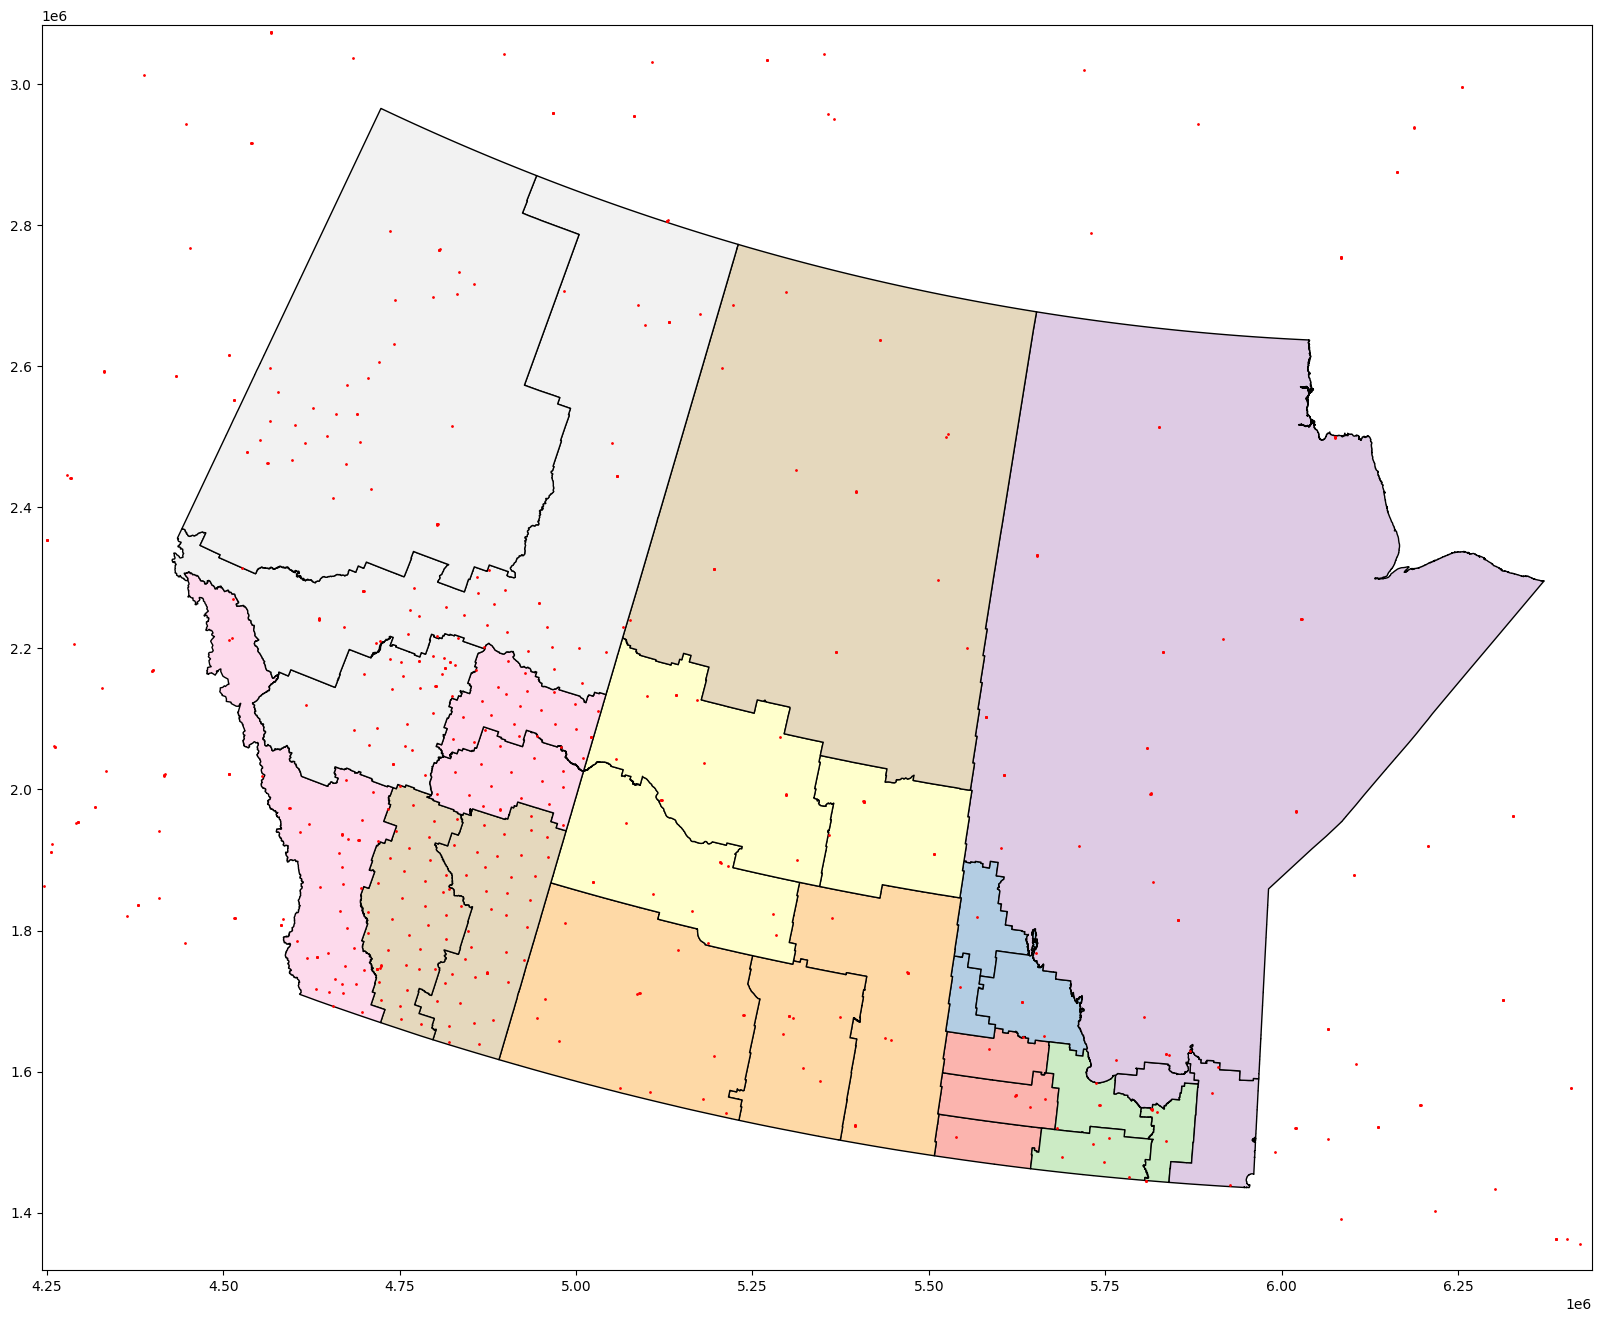

In [19]:
# plot stations vs projected regions
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny*2, maxy/1.7)
ax.set_xlim(minx*1.15, maxx/1.4)
gdfProjected.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStationsHly.plot(ax=ax, color='red', markersize=1)

<Axes: >

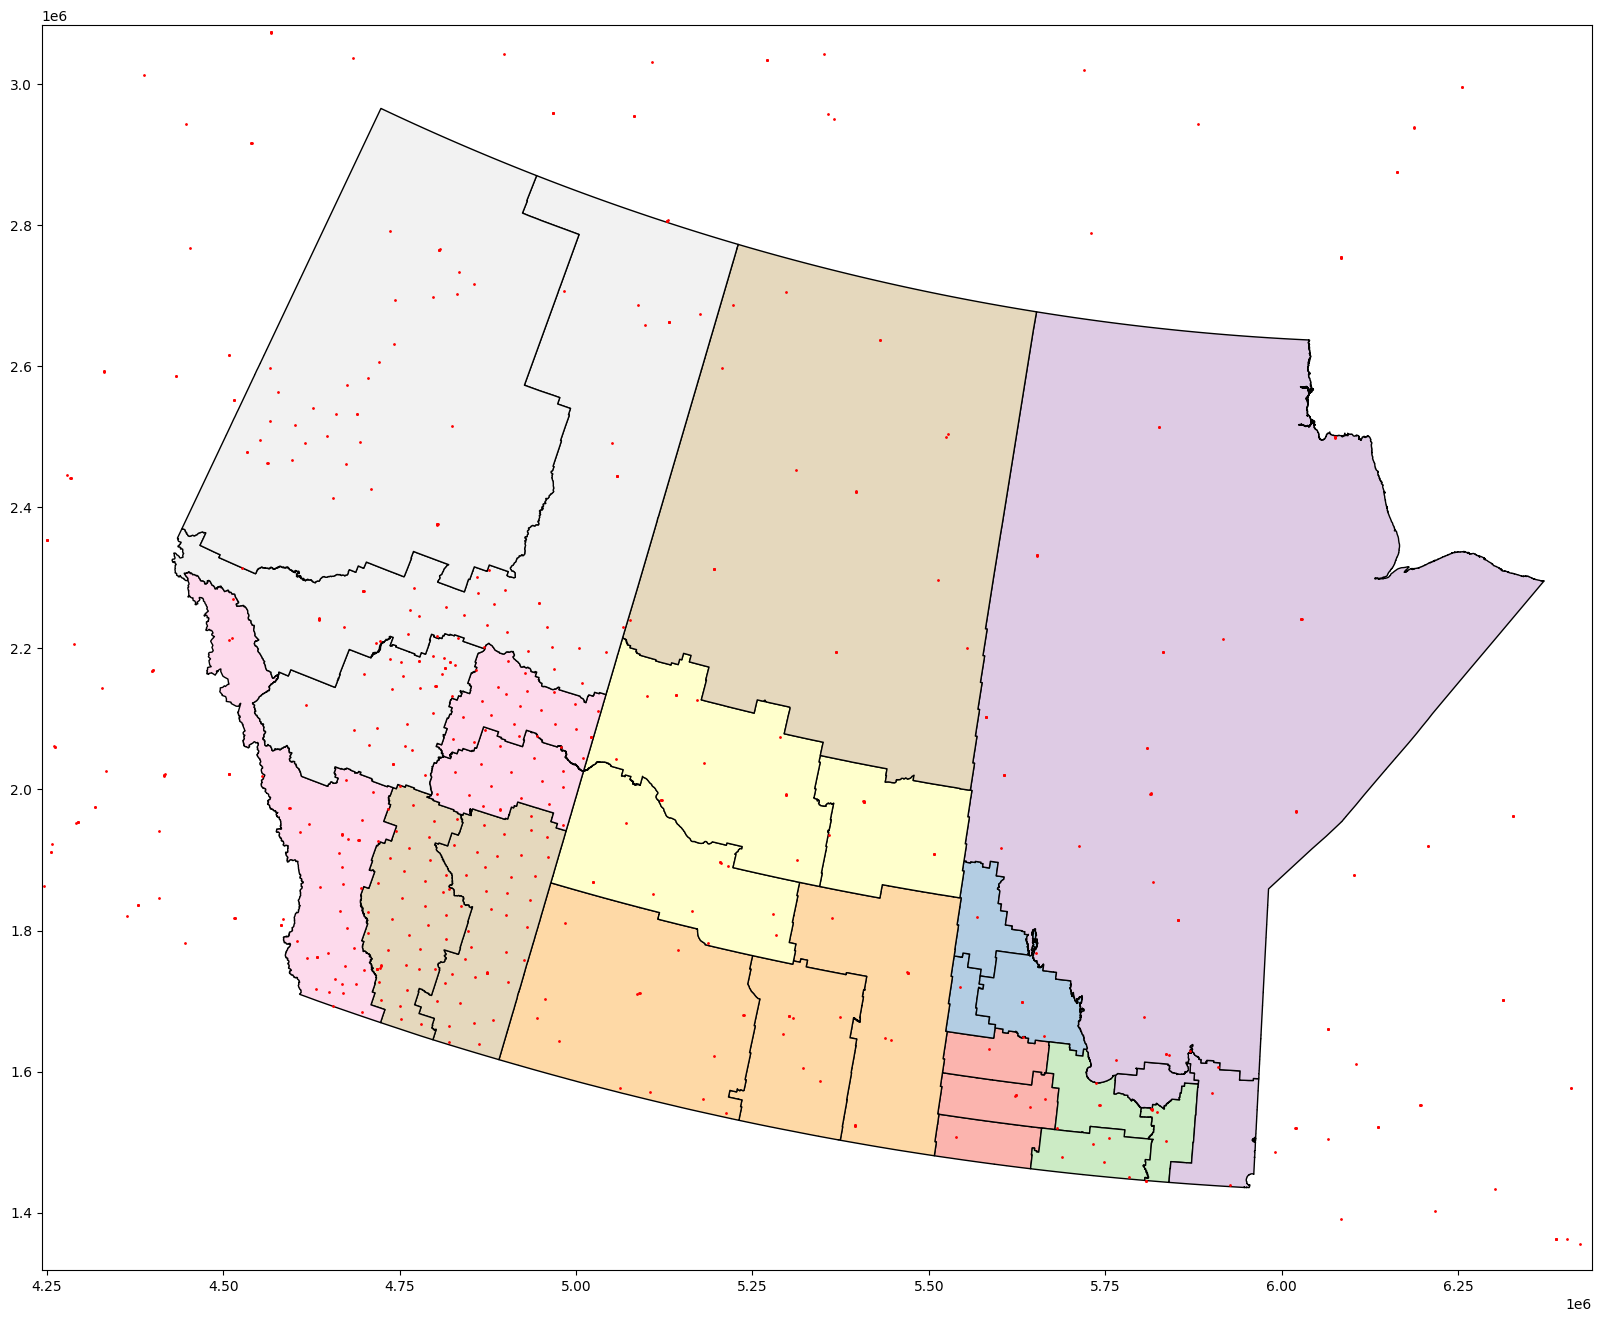

In [20]:
# plot stations vs projected regions
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny*2, maxy/1.7)
ax.set_xlim(minx*1.15, maxx/1.4)
gdfProjected.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStationsDly.plot(ax=ax, color='red', markersize=1)

In [21]:
gdfStationsDly.count()

Station Name      1608
Province          1608
Latitude          1608
Longitude         1608
Elevation         1608
                  ... 
DLY First Year    1518
DLY Last Year     1518
MLY First Year     826
MLY Last Year      826
geometry          1608
Length: 17, dtype: int64

In [22]:
# reindex 
gdfProjected.reset_index(inplace=True)

In [23]:
# gray in rgba
gdfProjected['color'] = "#808080"

In [24]:
gdfProjected['CRnum'] = 0

In [25]:
# list of 11 colors complimentary in rgba
colors = ["#FF0000", "#FF7F00", "#FFFF00", "#00FF00", "#0000FF", "#4B0082", "#9400D3", "#FF00FF", "#FF0000", "#FF7F00", "#FFFF00"]

In [26]:
# set first row color red in rgba
gdfProjected.at[0, 'color'] = colors[0]

# set second row color 
gdfProjected.at[1, 'color'] = colors[0]

# set third row color 
gdfProjected.at[2, 'color'] = colors[0]
gdfProjected.at[7, 'color'] = colors[0]

gdfProjected.at[0, 'CRnum'] = 3
gdfProjected.at[1, 'CRnum'] = 3
gdfProjected.at[2, 'CRnum'] = 3
gdfProjected.at[7, 'CRnum'] = 3



In [27]:

gdfProjected.at[3, 'color'] = colors[1]
gdfProjected.at[4, 'color'] = colors[1]
gdfProjected.at[5, 'color'] = colors[1]

gdfProjected.at[3, 'CRnum'] = 2
gdfProjected.at[4, 'CRnum'] = 2
gdfProjected.at[5, 'CRnum'] = 2

In [28]:

gdfProjected.at[6, 'color'] = colors[2]
gdfProjected.at[8, 'color'] = colors[2]
gdfProjected.at[9, 'color'] = colors[2]
gdfProjected.at[10, 'color'] = colors[2]

gdfProjected.at[6, 'CRnum'] = 1
gdfProjected.at[8, 'CRnum'] = 1
gdfProjected.at[9, 'CRnum'] = 1
gdfProjected.at[10, 'CRnum'] = 1

In [29]:

gdfProjected.at[11, 'color'] = "#808080"

In [30]:

gdfProjected.at[12, 'color'] = colors[3]
gdfProjected.at[13, 'color'] = colors[3]
gdfProjected.at[14, 'color'] = colors[3]

gdfProjected.at[12, 'CRnum'] = 8
gdfProjected.at[13, 'CRnum'] = 8
gdfProjected.at[14, 'CRnum'] = 8

In [31]:

gdfProjected.at[15, 'color'] = colors[4]
gdfProjected.at[16, 'color'] = colors[4]
gdfProjected.at[17, 'color'] = colors[4]

gdfProjected.at[15, 'CRnum'] = 9
gdfProjected.at[16, 'CRnum'] = 9
gdfProjected.at[17, 'CRnum'] = 9

In [32]:

gdfProjected.at[18, 'color'] = "#808080"
gdfProjected.at[19, 'color'] = "#808080"

In [33]:

gdfProjected.at[20, 'color'] = colors[5]
gdfProjected.at[21, 'color'] = colors[5]
gdfProjected.at[22, 'color'] = colors[5]
gdfProjected.at[23, 'color'] = colors[5]
gdfProjected.at[25, 'color'] = colors[5]

gdfProjected.at[20, 'CRnum'] = 4
gdfProjected.at[21, 'CRnum'] = 4
gdfProjected.at[22, 'CRnum'] = 4
gdfProjected.at[23, 'CRnum'] = 4
gdfProjected.at[25, 'CRnum'] = 4

In [34]:

gdfProjected.at[24, 'color'] = colors[7]
gdfProjected.at[26, 'color'] = colors[7]
gdfProjected.at[27, 'color'] = colors[7]
gdfProjected.at[28, 'color'] = colors[7]
gdfProjected.at[29, 'color'] = colors[7]

gdfProjected.at[24, 'CRnum'] = 5
gdfProjected.at[26, 'CRnum'] = 5
gdfProjected.at[27, 'CRnum'] = 5
gdfProjected.at[28, 'CRnum'] = 5
gdfProjected.at[29, 'CRnum'] = 5

In [35]:

gdfProjected.at[30, 'color'] = colors[6]
gdfProjected.at[31, 'color'] = colors[6]
gdfProjected.at[32, 'color'] = colors[6]
gdfProjected.at[36, 'color'] = colors[6]
gdfProjected.at[37, 'color'] = colors[6]

gdfProjected.at[30, 'CRnum'] = 6
gdfProjected.at[31, 'CRnum'] = 6
gdfProjected.at[32, 'CRnum'] = 6
gdfProjected.at[36, 'CRnum'] = 6
gdfProjected.at[37, 'CRnum'] = 6

In [36]:

gdfProjected.at[33, 'color'] = colors[8]
gdfProjected.at[34, 'color'] = colors[8]
gdfProjected.at[35, 'color'] = colors[8]
gdfProjected.at[38, 'color'] = colors[8]
gdfProjected.at[39, 'color'] = colors[8]

gdfProjected.at[33, 'CRnum'] = 7
gdfProjected.at[34, 'CRnum'] = 7
gdfProjected.at[35, 'CRnum'] = 7
gdfProjected.at[38, 'CRnum'] = 7
gdfProjected.at[39, 'CRnum'] = 7

<Axes: >

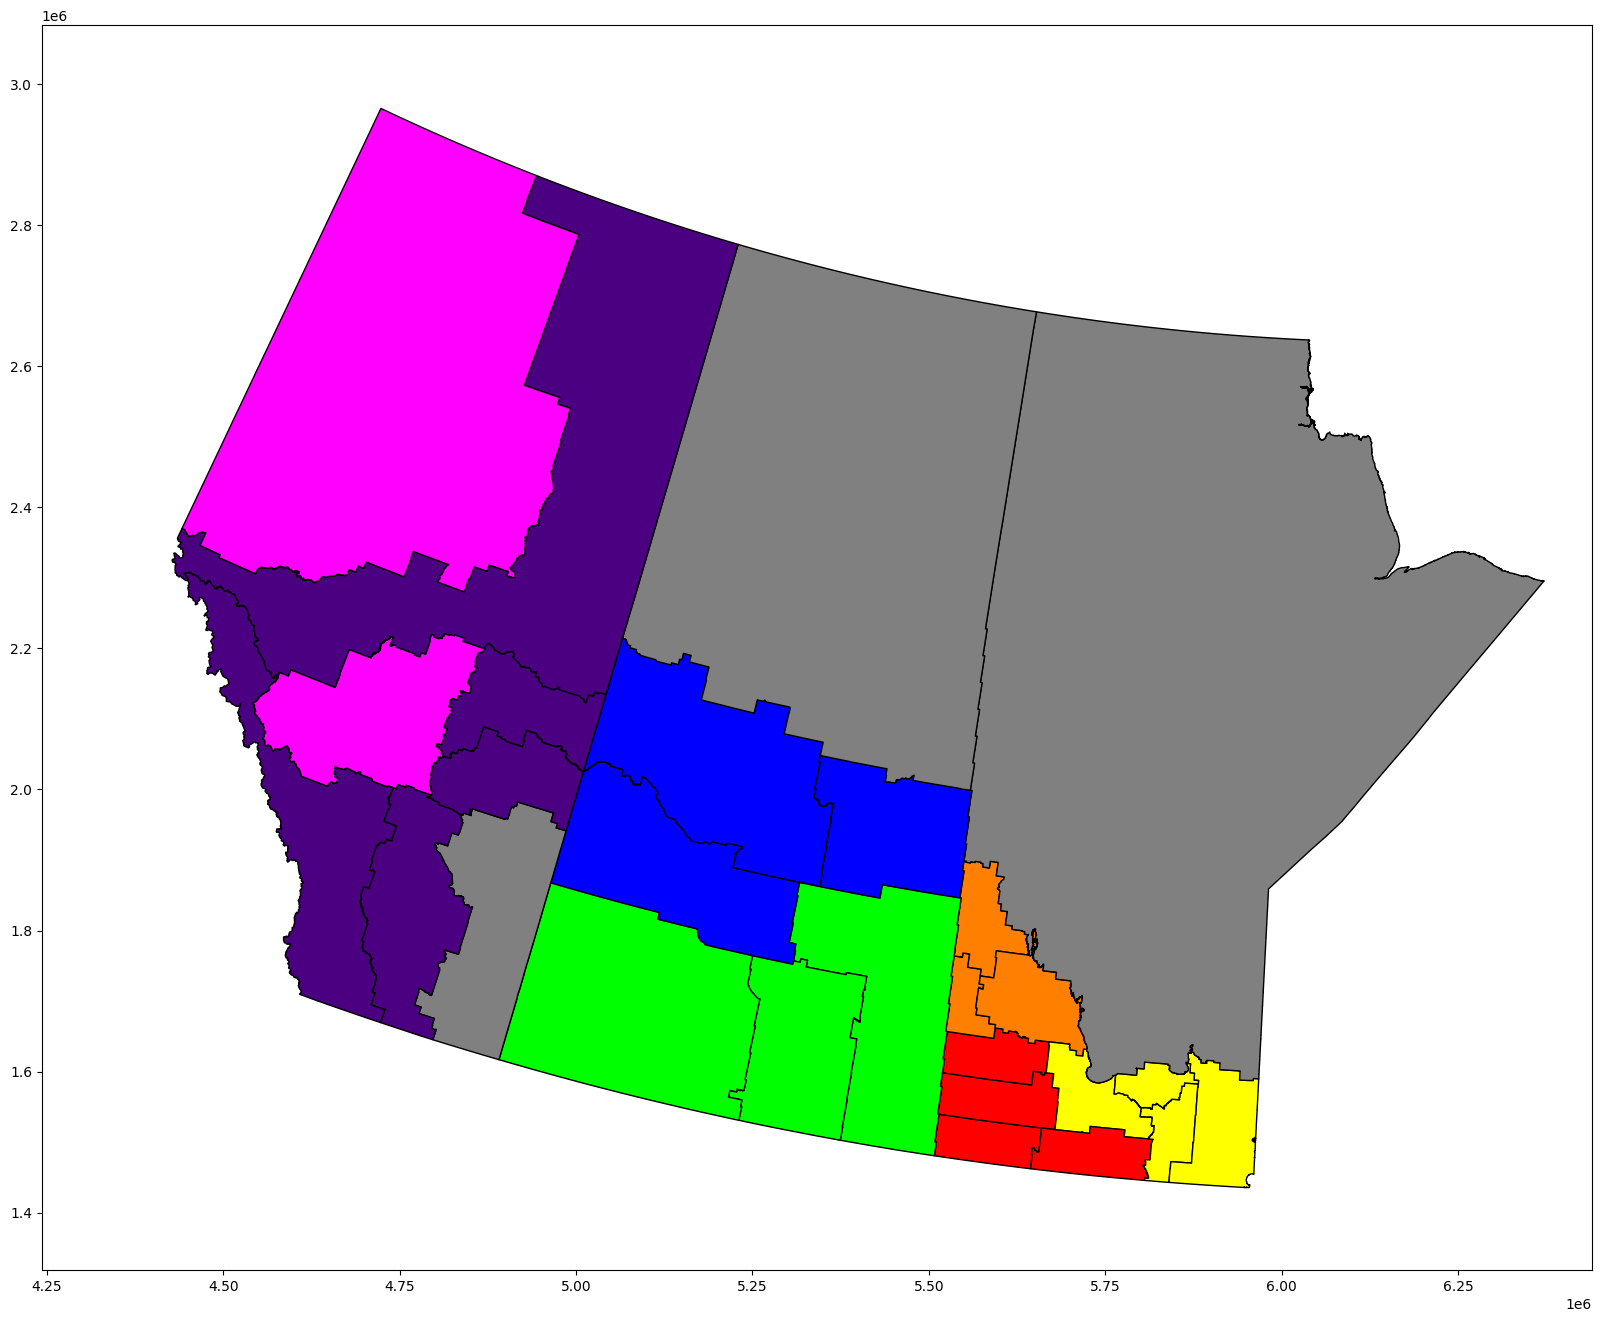

In [37]:
# plot using color column
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny*2, maxy/1.7)
ax.set_xlim(minx*1.15, maxx/1.4)
gdfProjected.plot(ax=ax, color=gdfProjected['color'], edgecolor='black')